---
# Assignment: Momentum Trading Strategies
---

This assignment builds practical skills in quantitative trading by implementing and evaluating momentum-based strategies.

You will:
- Implement and backtest **one** momentum strategy (core requirements)
- Implement **two additional** momentum strategies (extension for advanced coders)
- Build a **weighted composite momentum score** strategy (extension for advanced coders)
- Present and discuss your project and results on the afternoon of 15 Feb 2026

## Submission requirements
- A dedicated GitHub repository must be used to house and develop the project.
- Invite the assessment team (howesrichard, samihossain25, and jasonyan-s) as collaborators on your project.
- This notebook (`.ipynb`), with code and outputs, will form the central element of the project and should appear in the root folder of your repository.   You can have (and it is advised to make collaboration easier) functions and classes contained in separate python (.py) files in the repo which are imported into this notebook.
  - Ensure the notebook runs **top-to-bottom** without errors

## Background

Momentum trading is a strategy that seeks to profit from the continuation of existing market trends. The core idea is simple: assets that have performed well in the recent past tend, on average, to continue performing well in the near future, while assets that have performed poorly tend to continue underperforming. Unlike value or fundamental strategies, momentum trading relies almost entirely on **recent price behaviour**, rather than estimates of intrinsic value or long-term growth.

Momentum effects are commonly attributed to behavioural factors such as **investor underreaction**, **herding**, and **slow diffusion of information**. When new information enters the market, prices may adjust gradually rather than instantaneously. As more investors observe a rising (or falling) price and react, the trend can become self-reinforcing. However, because momentum strategies depend on trends persisting, they are vulnerable to sharp reversals, making careful implementation and backtesting essential.

To quantify momentum in a systematic way, traders use **technical indicators** derived from historical price data. In this assignment, we focus on three widely used momentum indicators.

---

### Rate of Change (ROC)

The **Rate of Change (ROC)** is one of the simplest momentum indicators. It measures how much the price of an asset has changed over a fixed look-back period.

Formally, for a look-back window of ( n ) days, the ROC at time ( t ) is calculated as:

$\text{ROC}_t = \frac{P_t - P_{t-n}}{P_{t-n}} \times 100$

where:

* $P_t$ is the price today
* $P_{t-n}$ is the price ($n$) days ago

A positive ROC indicates upward momentum (prices are higher than in the past), while a negative ROC indicates downward momentum. For example, an ROC of +5% over 10 days means the asset is trading 5% higher than it was 10 days ago. Because ROC is purely price-based, it reacts quickly to changes in trend but can also be noisy.

---

### Moving Average Crossover

A **moving average (MA)** smooths price data by averaging prices over a rolling window. For a window of ( n ) days, the simple moving average (SMA) is:

$\text{SMA}_t = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}$

A **moving average crossover strategy** compares two moving averages:

* a **short-term** moving average (e.g. 20 days)
* a **long-term** moving average (e.g. 50 or 100 days)

Momentum signals are generated based on their relative positions:

* **Bullish signal (go long):** short-term MA crosses above the long-term MA
* **Bearish signal (exit or short):** short-term MA crosses below the long-term MA

The intuition is that when recent prices rise faster than longer-term prices, a new upward trend may be forming. Moving average crossovers are slower to react than ROC but tend to produce smoother, more stable signals.

---

### MACD (Moving Average Convergence Divergence)

The **MACD** indicator measures momentum by comparing two **exponential moving averages (EMAs)**, which give more weight to recent prices.

First, two EMAs are computed:

* A **fast EMA** (commonly 12 days)
* A **slow EMA** (commonly 26 days)

The MACD line is defined as:

$\text{MACD}_t = \text{EMA}_{\text{fast},t} - \text{EMA}_{\text{slow},t}$

Next, a **signal line** is calculated as the EMA of the MACD line itself (typically over 9 days):

$\text{Signal}_t = \text{EMA}_9(\text{MACD}_t)$

Trading signals are generated as follows:

* **Bullish signal:** MACD crosses above the signal line
* **Bearish signal:** MACD crosses below the signal line

MACD captures both **trend direction** and **trend strength**, making it a popular choice for momentum strategies that aim to balance responsiveness with noise reduction.

---

### Why Multiple Indicators?

Each indicator captures momentum in a slightly different way:

* ROC reacts quickly but can be volatile
* Moving averages provide smoother trend signals
* MACD blends responsiveness with trend confirmation



---
## Marking criteria
---

### Code quality
- Clean and thoughtful structure and architecture
- Thoughtful implementation of object oriented methodology / structure where appropriate
- Sensible function and method design and use
- Clear variable names
- Appropriate use of pandas/numpy
- Documentation (comments in code) are clear and thoughtful
- README file is useful and helpful

### Code ownership
- AI coding assistance is permitted but the team needs to deeply understand and own its code
- Code understanding will be interrogated during assessment session
- Each team member will own their section of code and will be responsible for discussing and explaining it during the presentation

### Collaboration quality
- Teams will be assessed on how balanced the workload is and how effectively delegation is performed
- Appropriate and strategic use of GitHub and Git to enhance collaboration
- Commit history, including use of branches, reveals balanced workload across team members
- Well docmented commit history (appropriate commit comments)
- Presentation of project / results shared across team

### Specific areas of focus
#### Part A — Core strategy implementation
1. **Data handling & setup**
   - Loads and cleans price data correctly (dates sorted, missing values handled)
   - Uses appropriate columns and indexing

2. **Indicator + signal implementation**
   - Correct indicator calculation (ROC / MA crossover / MACD)
   - Signal is well-defined and correctly generated (0/1 long/cash)

3. **Backtest correctness**
   - Uses a consistent trading assumption (e.g., signal shifted by 1 day)
   - Returns and equity curve computed correctly
   - Trade counting logic is reasonable

4. **Reporting & explanation**
   - Outputs key metrics and plots
   - Clear 2–5 sentence explanation of how the strategy trades

### Part B — Extensions
5. **Two additional strategies implemented**
   - Both strategies work and are backtested under the same assumptions

6. **Comparison and discussion**
   - Side-by-side comparison of metrics
   - Brief, sensible interpretation of differences

7. **Composite score construction**
   - Sub-scores are standardised and justified (e.g., -2…+2 or -1…+1)
   - Weights sum to 1 and are applied correctly
   - Threshold trading rule implemented correctly

8. **Composite strategy reporting**
   - Score plot and equity curve
   - Reports chosen weights and threshold clearly

**Note:** Minor numerical differences are acceptable if methodology is correct and assumptions are stated.


---
## Assumptions and rules
---

Use a simple, consistent backtest setup:
- Trade at **next day close** (i.e., use yesterday’s signal as today’s position)
- Ignore transaction costs and slippage (unless you choose to add them)
- Long/cash only for Part A
- Extensions may optionally include shorting, but it is not required

### What “backtest” means here
A backtest simulates how your portfolio would have performed historically if you had followed your trading rules mechanically.


In [17]:
# Import your functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

---
# Part A: Core Task — Implement One Momentum Strategy
---

## Task
Choose **ONE** strategy to implement and backtest:
1. **ROC Threshold**
2. **Moving Average (MA) Crossover**
3. **MACD Signal**

## Deliverables
- Correct implementation of your chosen strategy
- Backtest results:
  - Total return
  - Number of trades
  - Equity curve
  - Price plot with buy/sell markers
- Short explanation (2–5 sentences) describing how the strategy trades


---
## Step 1: Load price data
---

You may either:
- Load a **CSV** containing at least: `Date`, `Close`
- Or download data using `yfinance`

**Recommendation:** Use a single liquid equity ticker (e.g., `AAPL`, `AMD`, `MSFT`).

> **Checkpoint 1:** Once you have loaded the data and visualised the price series, save your work and commit this milestone (e.g., "Loaded data and initial plot").   
- It is good practice to have more frequent commits that this.   Notwithstanding, try to have a commit at this checkpoint.
- If the development of the price loading capability in the project is being done on a separate branch by one of the collaborating team members (a good sign of collaboration), then create a Pull Request and merge the branch before this checkpoint commit.


In [ ]:
# Load Data
# In future, change to function so that can pass in different ticker
ticker = "AAPL"
data = yf.download(ticker, start="2000-01-01", end="2026-01-19")
df = pd.DataFrame(data.reset_index())
df = df.dropna().reset_index(drop=True)
df


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.839280,0.843498,0.762428,0.786328,535796800
1,2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2,2000-01-05,0.779767,0.828971,0.772270,0.777892,778321600
3,2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
4,2000-01-07,0.746027,0.757274,0.716037,0.723534,460734400
...,...,...,...,...,...,...
6545,2026-01-12,260.250000,261.299988,256.799988,259.160004,45263800
6546,2026-01-13,261.049988,261.809998,258.390015,258.720001,45730800
6547,2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400


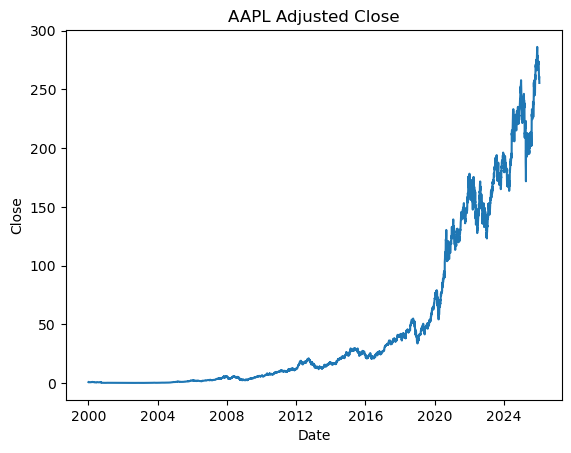

In [19]:
# Display the visualisation of the data

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["Date"], df["Close"])
plt.title(f"{ticker} Adjusted Close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()


---
## Step 2: Backtest framework
---

You will generate a `signal`:
- `1` = long
- `0` = cash

The backtest uses `position = signal.shift(1)` to avoid look-ahead bias.


In [ ]:
# Define the function which will develop

def backtest_signal_only(df: pd.DataFrame, signal: pd.Series) -> pd.DataFrame:
    results = df.copy()

    # stoire sig
    results["signal"] = signal.astype(int)

    # trade at next day close
    results["position"] = results["signal"].shift(1).fillna(0).astype(int)

    return results

---
## Step 3: Implement one strategy
---

Implement **ONE** of the following by producing a `signal` series (0/1). Comment out the options you are not using.

**Guidance:** Choose which strategy option (A1, A2, or A3) you will implement and use only that signal. For whichever strategy you pick, decide on appropriate parameter values:
- If using **ROC Threshold**: select the lookback window `roc_n` and a percentage threshold. (e.g., `roc_n=10` and `roc_threshold=0.03` means go long if price has risen more than 3% over the last 10 days.)
- If using **MA Crossover**: choose short (`fast_n`) and long (`slow_n`) moving average lengths. (A typical choice might be 20-day vs 50-day MAs, but you can experiment.)
- If using **MACD**: you can use the standard periods (12, 26, 9) for fast EMA, slow EMA, and signal line, or other values if justified.


> **Checkpoint 2:** After developing one trading strategy, considering committing your notebook (e.g., "Completed ROC Threshold").   As with checkpoint 1, note the preference for more frequent commits together with branches and pull requests as part of the collaboration.   This comment applies to all checkpoints.


---
### Option A1: ROC Threshold
---

**Rule:** Buy if the price increased by more than a threshold over the last `roc_n` days.


In [21]:
# Develop the ROC indicator
def ROC_strategy(price_data, roc_n = 10, roc_threshold = 0.03):
    roc_signal = [0] * len(price_data)

    for i in range(len(price_data)): 
        if i - roc_n < 0: 
            pass
        else: 
            price_now = price_data.iloc[i]["Close"].item()
            price_then = price_data.iloc[i-roc_n]["Close"].item()
            price_rise = (price_now - price_then) / price_then

            if price_rise > roc_threshold: 
                roc_signal[i] = 1
            
    price_data["ROC_Signal"] = roc_signal
    return price_data

---
### Option A2: Moving Average Crossover
---

**Rule:** Buy when a fast moving average is above a slow moving average.


In [22]:
# Develop the Moving Average Crossover indicator

---
### Option A3: MACD Signal
---

**Rule:** Buy when MACD is above its signal line.
- `MACD = EMA(12) - EMA(26)`
- `Signal line = EMA(9) of MACD`


In [23]:
# Develop the MACD indicator

---
## Step 4: Backtest and report (Part A)
---

Run your backtest and report:
- Total return
- Number of trades
- Equity curve
- Price chart with buy/sell markers


In [24]:
# Run the backtest amd report the results

---
## Part A short write-up
---

**Write 2–5 sentences:**
- What does your indicator measure?
- When does your strategy enter/exit?
- Why might this work (behavioural explanation)?

**Answer:**
- TODO

> **Checkpoint 3:** After completing the Part A strategy implementation and backtest, consider committing your notebook (e.g., "Finished Part A strategy").


---
# Part B: Extensions — Multiple Strategies and Composite Score
---

This section extends Part A by implementing multiple strategies and combining them into a composite score.


---
## Extension B1: Implement two additional strategies
---

Implement the **two strategies you did not choose** in Part A.

Use the provided functions to create signals for each new strategy. For example, if you chose ROC in Part A, you can use `signal_ma_crossover(...)` for one of the extensions and `signal_macd(...)` for the other. Ensure each strategy's signal is a 0/1 series like before, then backtest them just as in Part A.

### Deliverables
- Backtest each strategy under the same assumptions
- Produce a simple comparison table: total return, number of trades

> **Checkpoint 4:** Once you have completed a strategy, commit your progress (e.g., "Completed MA Crossover").


In [25]:
# Complete the other strategy 1

In [26]:
# Complete the other strategy 2

---
## Extension B2: Composite momentum score strategy
---

Build a composite score from ROC, MA crossover, and MACD.

### Requirements
- Convert each indicator into a **standardised sub-score** (e.g., -2..+2)
- Choose weights that sum to 1:
  $w_{roc} + w_{ma} + w_{macd} = 1$
- Composite score:
  $Score_t = w_{roc}s^{roc}_t + w_{ma}s^{ma}_t + w_{macd}s^{macd}_t$
- Trading rule (long/cash):
  - Long if `Score >= x`
  - Cash if `Score < x`

**Guidance:** First, convert each strategy's signal into a numerical sub-score on a common scale (we use -2 to +2 for ROC buckets, and -1/+1 for MA and MACD signals as given above). Next, assign weights to each component based on how much emphasis you want to give it. (If unsure, equal weights is a reasonable starting point.) Make sure the weights sum to 1. Then choose a threshold `x` for the composite score that determines when to go long. For example, `x = 0` would mean any positive composite signal triggers a long position, whereas a higher threshold (like 0.5) would require stronger agreement among indicators to enter a trade.


In [27]:
# Complete the function which trades based on a composite score

---
## Extension B2 short write-up
---

**Write 4–8 sentences:**
- Why did you choose your weights and threshold `x`?
- Did the composite score outperform your best single strategy?
- What is one limitation of this backtest?

**Answer:**
- TODO

> **Checkpoint 5:** You have now completed the composite strategy implementation. Review your results and then make a final commit of the notebook (e.g., "Completed momentum strategies assignment").
